In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import randint
from DataPreparetion import DataPreparetion
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import (
    GridSearchCV,
    train_test_split,
    RandomizedSearchCV
)
from sklearn.metrics import (
    ConfusionMatrixDisplay,
    balanced_accuracy_score,
    confusion_matrix, 
    accuracy_score, 
    precision_score, 
    recall_score, 
    f1_score, 
    roc_auc_score
)


# Modelo de Previsão de Churn:

Preveja os usuários com alta chance de deixar seu Streaming:

## Dataframe:

In [2]:
path = r'../data/streaming_data.csv'
df = pd.read_csv(
    filepath_or_buffer=path,
    decimal='.',
    sep=','
)

In [3]:
display(df.head(3))

,Age,Gender,Time_on_platform,Devices_connected,Subscription_type,Num_streaming_services,Num_active_profiles,Avg_rating,Churned,User_id
0,49.0,Male,4700.0,3.0,Basic,NaN,3,NaN,0.0,a271aa56-bcfc-4f0a-91f7-b773de6b86a4
1,69.0,Female,6107.0,2.0,Standard,NaN,1,2.14,0.0,fe14b048-770b-4619-8ec6-485b0969ae31
2,44.0,Male,6374.0,3.0,Premium,1.0,1,1.91,1.0,0283dffd-6684-4a05-9c6f-c02098a6849d


## Código:

In [4]:
class ChurnPrediction(DataPreparetion):
    def training(self, x: pd.DataFrame, y: pd.DataFrame, modelo):
        x_train, x_test, y_train, y_test = train_test_split(
            x, 
            y, 
            test_size=0.2, 
            random_state=42
        )

        training = (
            modelo.fit(x_train, y_train)
        )

        y_pred = training.predict(x_test)

        return training, y_pred, x_train, x_test, y_train, y_test
    
    def predictions(self, training, input):
        return training.predict(input)
    
    def tunning_grid_search(self, training, parameters, x_train, y_train):
        # Criamos um GridSearch passando o modelo, os parâmetros, a métrica que queremos otimizar. 
        grid_search = GridSearchCV(training, parameters, scoring='roc_auc', cv=5, n_jobs=-1)

        training = grid_search.fit(x_train, y_train)

        parameters = training.best_estimator_.get_params()

        return parameters, grid_search
    
    def tunning_random_search(self, training, parameters, x_train, y_train):
        # Realize a busca aleatória para encontrar a melhor combinação de hiperparâmetros
        random_search = RandomizedSearchCV(training, parameters, n_iter=10, cv=5)

        training = random_search.fit(x_train, y_train)

        parameters = training.best_estimator_.get_params()

        return parameters, random_search
    
    def gráfico_matrix_confusão(self, training, x_test, y_test):
        fig = plt.figure(figsize=(40,20))

        gráfico_de_métricas = ConfusionMatrixDisplay.from_estimator(training, x_test, y_test, values_format='d');

        return gráfico_de_métricas

    def avaliar_desempenho(self, y_true, y_pred):
        # Matriz de Confusão
        matriz_confusao = confusion_matrix(y_true, y_pred)
        print("Matriz de Confusão:")
        print(matriz_confusao)

        # Acurácia
        acuracia = accuracy_score(y_true, y_pred)
        print("Acurácia:", acuracia)

        # Precisão
        precisao = precision_score(y_true, y_pred)
        print("Precisão:", precisao)

        # Recall
        recall = recall_score(y_true, y_pred)
        print("Recall:", recall)

        # F1-Score
        f1 = f1_score(y_true, y_pred)
        print("F1-Score:", f1)

        # AUC-ROC
        auc_roc = roc_auc_score(y_true, y_pred)
        print("AUC-ROC:", auc_roc)

    def métrica(self, training, x_train, x_test, y_train, y_test):
        print(f"Acurácia (Treino): {accuracy_score(y_train, training.predict(x_train))}")
        print(f"Acurácia (Teste): {accuracy_score(y_test, training.predict(x_test))}")
        print("====================================")
        print(f"Acurácia Balanceada (Treino): {balanced_accuracy_score(y_train, training.predict(x_train))}")
        print(f"Acurácia Balanceada (Teste): {balanced_accuracy_score(y_test, training.predict(x_test))}")
        print("====================================")
        print(f"Precision (Treino): {precision_score(y_train, training.predict(x_train))}")
        print(f"Precision (Teste): {precision_score(y_test, training.predict(x_test))}")
        print("====================================")
        print(f"Recall (Treino): {recall_score(y_train, training.predict(x_train))}")
        print(f"Recall (Teste): {recall_score(y_test, training.predict(x_test))}")
        print("====================================")
        print(f"F1-Score (Treino): {f1_score(y_train, training.predict(x_train))}")
        print(f"F1-Score (Teste): {f1_score(y_test, training.predict(x_test))}")
        print("====================================")
        print(f"ROCAUC (Treino): {roc_auc_score(y_train, training.predict_proba(x_train)[:,1])}")
        print(f"ROCAUC (Teste): {roc_auc_score(y_test, training.predict_proba(x_test)[:,1])}")


if __name__ == '__main__':
    churn_prediction = ChurnPrediction()

## Output:

### Data Understanding:

In [5]:
display(df.head(3))

,Age,Gender,Time_on_platform,Devices_connected,Subscription_type,Num_streaming_services,Num_active_profiles,Avg_rating,Churned,User_id
0,49.0,Male,4700.0,3.0,Basic,NaN,3,NaN,0.0,a271aa56-bcfc-4f0a-91f7-b773de6b86a4
1,69.0,Female,6107.0,2.0,Standard,NaN,1,2.14,0.0,fe14b048-770b-4619-8ec6-485b0969ae31
2,44.0,Male,6374.0,3.0,Premium,1.0,1,1.91,1.0,0283dffd-6684-4a05-9c6f-c02098a6849d


In [6]:
df.columns

Index(['Age', 'Gender', 'Time_on_platform', 'Devices_connected',
       'Subscription_type', 'Num_streaming_services', 'Num_active_profiles',
       'Avg_rating', 'Churned', 'User_id'],
      dtype='object')

In [7]:
churn_prediction.verificando_as_dimensões_do_dataframe(
    dataframe=df
)

Linhas: 77884 
Colunas: 10


In [8]:
churn_prediction.descrição(
    dataframe=df
)

,Age,Time_on_platform,Devices_connected,Num_streaming_services,Num_active_profiles,Avg_rating,Churned
count,66607.00,56464.00,52696.00,9572.00,77884.00,60614.00,61148.00
mean,43.51,4385.85,3.00,2.50,3.00,3.00,0.24
std,15.04,2526.58,1.41,1.12,1.41,1.15,0.43
min,18.00,0.00,1.00,1.00,1.00,1.00,0.00
25%,30.00,2196.00,2.00,1.00,2.00,1.99,0.00
50%,43.00,4384.00,3.00,2.00,3.00,3.01,0.00
75%,57.00,6573.00,4.00,4.00,4.00,4.00,0.00
max,69.00,8759.00,5.00,4.00,5.00,5.00,1.00


In [9]:
churn_prediction.verificando_tipos(
    dataframe=df
)

,Tipos
Age,float64
Gender,object
Time_on_platform,float64
Devices_connected,float64
Subscription_type,object
Num_streaming_services,float64
Num_active_profiles,int64
Avg_rating,float64
Churned,float64
User_id,object


In [10]:
churn_prediction.verificando_valores_nulos(
    dataframe=df
)

,Quantidade,Porcentagem
Age,11277,14.48%
Gender,14516,18.64%
Time_on_platform,21420,27.50%
Devices_connected,25188,32.34%
Subscription_type,25221,32.38%
Num_streaming_services,68312,87.71%
Num_active_profiles,0,0.00%
Avg_rating,17270,22.17%
Churned,16736,21.49%
User_id,0,0.00%


### Data Preparetion:

In [11]:
df_copy = df.copy()

In [12]:
colunas = [
    'Time_on_platform', 
    'Num_streaming_services', 
    'Churned', 
    'Avg_rating', 
    'Devices_connected',
]

In [13]:
df[colunas] = churn_prediction.substituindo_valores(
    dataframe=df,
    colunas=colunas,
    valores={
        np.nan:  0,
    }
)

In [14]:
colunas = ['Gender', 'Subscription_type', 'Age']

In [15]:
df = churn_prediction.removendo_nulos(
    dataframe=df,
    colunas=colunas
)

In [16]:
colunas = ['Churned', 'Gender']

In [17]:
for coluna in colunas:
    df[coluna] = churn_prediction.label_endcode(
        dataframe=df[coluna]
    )

In [18]:
colunas_float = df.select_dtypes(include='float').columns

In [19]:
df[colunas_float] = churn_prediction.convertendo_colunas(
    dataframe=df,
    colunas=colunas_float,
    tipo='int'
)

In [20]:
dataframe, colunas = churn_prediction.dummy(
    dataframe=df,
    colunas=['Subscription_type',]
)

df[colunas] = dataframe[colunas]

In [21]:
df = churn_prediction.removendo_colunas(
    dataframe=df,
    colunas=['Subscription_type']
)

### Modeling:

In [22]:
x = df.drop(labels=['Churned', 'User_id'], axis=1)
y = df['Churned']

### Regressão Logística

In [23]:
modelo = LogisticRegression()

In [24]:
training, y_pred, x_train, x_test, y_train, y_test = churn_prediction.training(
    x=x,
    y=y,
    modelo=modelo
);

/home/guerrlr0/anaconda3/envs/.churn/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<Figure size 4000x2000 with 0 Axes>

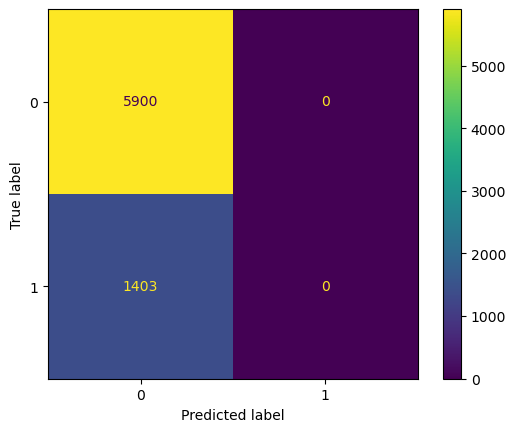

In [25]:
churn_prediction.gráfico_matrix_confusão(
    training=training,
    y_test=y_test,
    x_test=x_test,
);

In [26]:
churn_prediction.avaliar_desempenho(
    y_true=y_test,
    y_pred=y_pred
)

Matriz de Confusão:
[[5900    0]
 [1403    0]]
Acurácia: 0.8078871696563056
Precisão: 0.0
Recall: 0.0
F1-Score: 0.0
AUC-ROC: 0.5


/home/guerrlr0/anaconda3/envs/.churn/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [27]:
churn_prediction.métrica(
    training=training,
    x_train=x_train,
    x_test=x_test,
    y_train=y_train,
    y_test=y_test,
)

Acurácia (Treino): 0.8064836368615638
Acurácia (Teste): 0.8078871696563056
Acurácia Balanceada (Treino): 0.5
Acurácia Balanceada (Teste): 0.5
Precision (Treino): 0.0
Precision (Teste): 0.0
Recall (Treino): 0.0
Recall (Teste): 0.0
F1-Score (Treino): 0.0
F1-Score (Teste): 0.0
ROCAUC (Treino): 0.5012715853525496
ROCAUC (Teste): 0.5088121096439833


/home/guerrlr0/anaconda3/envs/.churn/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/guerrlr0/anaconda3/envs/.churn/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### Regressão Logística - GridSearchCV:

In [28]:
parametros = {
    'penalty': ['l1', 'l2'],
    'C': [0.1, 1, 10],
    'solver': ['liblinear', 'saga']
}


In [29]:
parameters, grid_search = churn_prediction.tunning_grid_search(
    training=training,
    parameters=parametros,
    x_train=x_train,
    y_train=y_train
);

/home/guerrlr0/anaconda3/envs/.churn/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/guerrlr0/anaconda3/envs/.churn/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/guerrlr0/anaconda3/envs/.churn/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/guerrlr0/anaconda3/envs/.churn/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/guerrlr0/anaconda3/envs/.churn/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.w

In [30]:
print(parameters)

{'C': 0.1, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l1', 'random_state': None, 'solver': 'saga', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


#### Regressão Logística - Tunning:

In [31]:
modelo = LogisticRegression(
    C=0.1, 
    class_weight=None, 
    dual=False, 
    fit_intercept=True, 
    intercept_scaling=1, 
    l1_ratio=None, 
    max_iter=100, 
    multi_class='auto', 
    n_jobs=None, 
    penalty='l1', 
    random_state=None, 
    solver='saga', 
    tol=0.0001, 
    verbose=0, 
    warm_start=False
)

In [32]:
training, y_pred, x_train, x_test, y_train, y_test = churn_prediction.training(
    x=x,
    y=y,
    modelo=modelo
);

/home/guerrlr0/anaconda3/envs/.churn/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


<Figure size 4000x2000 with 0 Axes>

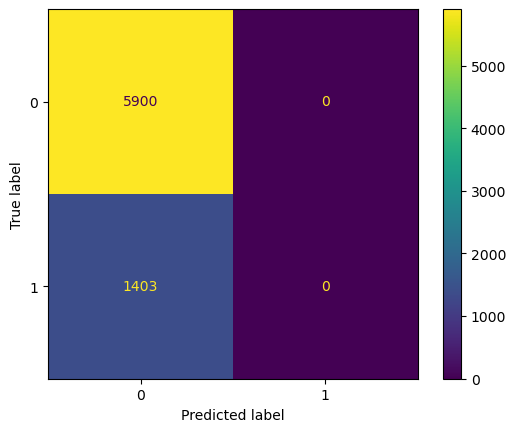

In [33]:
churn_prediction.gráfico_matrix_confusão(
    training=training,
    y_test=y_test,
    x_test=x_test,
);

In [34]:
churn_prediction.avaliar_desempenho(
    y_true=y_test,
    y_pred=y_pred
)

Matriz de Confusão:
[[5900    0]
 [1403    0]]
Acurácia: 0.8078871696563056
Precisão: 0.0
Recall: 0.0
F1-Score: 0.0
AUC-ROC: 0.5


/home/guerrlr0/anaconda3/envs/.churn/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [35]:
churn_prediction.métrica(
    training=training,
    x_train=x_train,
    x_test=x_test,
    y_train=y_train,
    y_test=y_test,
)

Acurácia (Treino): 0.8064836368615638
Acurácia (Teste): 0.8078871696563056
Acurácia Balanceada (Treino): 0.5
Acurácia Balanceada (Teste): 0.5
Precision (Treino): 0.0
Precision (Teste): 0.0
Recall (Treino): 0.0
Recall (Teste): 0.0
F1-Score (Treino): 0.0
F1-Score (Teste): 0.0
ROCAUC (Treino): 0.5021648040723409
ROCAUC (Teste): 0.5039489230100149


/home/guerrlr0/anaconda3/envs/.churn/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/guerrlr0/anaconda3/envs/.churn/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Random Forest:

In [36]:
modelo = RandomForestClassifier()

In [37]:
training, y_pred, x_train, x_test, y_train, y_test = churn_prediction.training(
    x=x,
    y=y,
    modelo=modelo
);

<Figure size 4000x2000 with 0 Axes>

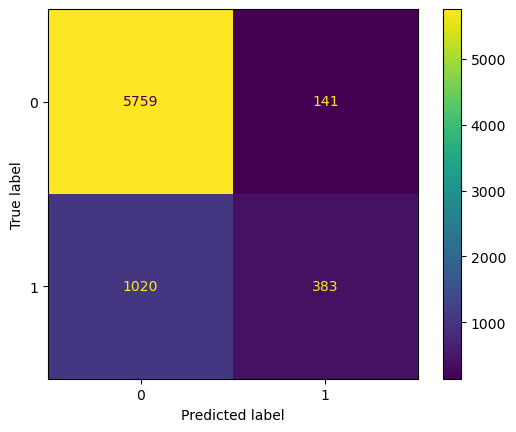

In [38]:
churn_prediction.gráfico_matrix_confusão(
    training=training,
    y_test=y_test,
    x_test=x_test,
);

In [39]:
churn_prediction.métrica(
    training=training,
    x_train=x_train,
    x_test=x_test,
    y_train=y_train,
    y_test=y_test,
)

Acurácia (Treino): 0.994488566342599
Acurácia (Teste): 0.8410242366150897
Acurácia Balanceada (Treino): 0.9888521373564323
Acurácia Balanceada (Teste): 0.6245440762530654
Precision (Treino): 0.9917621776504298
Precision (Teste): 0.7309160305343512
Recall (Treino): 0.9796568193879356
Recall (Teste): 0.2729864575908767
F1-Score (Treino): 0.98567233247308
F1-Score (Teste): 0.3975090814737935
ROCAUC (Treino): 0.9998053221998686
ROCAUC (Teste): 0.6894868139700642


#### Random Forest - RandomizedSearchCV:

In [40]:
parametros = {
    'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
}

In [41]:
parameters, grid_search = churn_prediction.tunning_grid_search(
    training=training,
    parameters=parametros,
    x_train=x_train,
    y_train=y_train
);

In [42]:
print(parameters)

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 10, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


#### Random Forest - Tunning:

In [43]:
modelo = RandomForestClassifier(
    bootstrap=True,
    ccp_alpha=0.0,
    class_weight=None,
    criterion='gini',
    max_depth=10,
    max_features='sqrt',
    max_leaf_nodes=None,
    max_samples=None,
    min_impurity_decrease=0.0,
    min_samples_leaf=1,
    min_samples_split=2,
    min_weight_fraction_leaf=0.0,
    n_estimators=100,
    n_jobs=None,
    oob_score=False,
    random_state=None,
    verbose=0,
    warm_start=False
)

In [44]:
training, y_pred, x_train, x_test, y_train, y_test = churn_prediction.training(
    x=x,
    y=y,
    modelo=modelo
);

<Figure size 4000x2000 with 0 Axes>

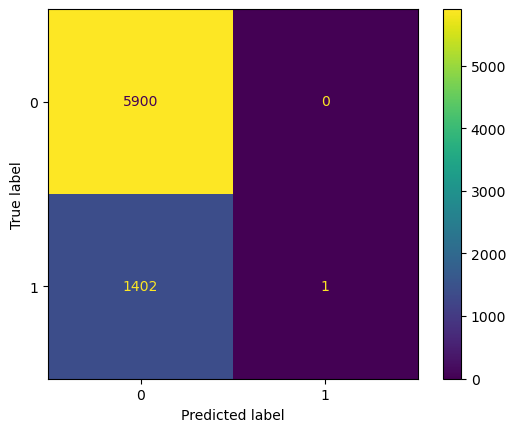

In [45]:
churn_prediction.gráfico_matrix_confusão(
    training=training,
    y_test=y_test,
    x_test=x_test,
);

In [46]:
churn_prediction.métrica(
    training=training,
    x_train=x_train,
    x_test=x_test,
    y_train=y_train,
    y_test=y_test,
)

Acurácia (Treino): 0.8075106120772285
Acurácia (Teste): 0.808024099685061
Acurácia Balanceada (Treino): 0.5026534583407041
Acurácia Balanceada (Teste): 0.5003563791874555
Precision (Treino): 1.0
Precision (Teste): 1.0
Recall (Treino): 0.005306916681408102
Recall (Teste): 0.0007127583749109052
F1-Score (Treino): 0.01055780397677283
F1-Score (Teste): 0.0014245014245014246
ROCAUC (Treino): 0.8791644085220717
ROCAUC (Teste): 0.5895406936709472
